In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
import ToolBox as tb

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
X = pd.read_csv('data\clean_data\clean_features.csv')
y = pd.read_csv('data\clean_data\clean_target_gpa.csv')['GPA']

In [54]:
info_col={'StudentID': 'A unique identifier assigned to each student (1001 to 3392).',
                    'Age': 'The age of the students ranges from 15 to 18 years.',
                    'Gender': ' Gender of the students, where 0 represents Male and 1 represents Female.',
                    'Ethnicity': ' The ethnicity of the students, coded as \n 0: Caucasian \n 1: African American \n 2: Asian \n 3: Other',
                    'ParentalEducation': "The education level of the parents, coded as \n 0: None \n 1: High School \n 2: Some College \n 3: Bachelor's \n 4: Higher",
                    'StudyTimeWeekly': 'Weekly study time in hours, ranging from 0 to 20.',
                    'Absences': 'Number of absences during the school year, ranging from 0 to 30.',
                    'Tutoring': 'Tutoring status, where 0 indicates No and 1 indicates Yes.',
                    'ParentalSupport': 'The level of parental support, coded as \n 0: None \n 1: Low \n 2: Moderate \n 3: High \n 4: Very High',
                    'Extracurricular': 'Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.',
                    'Sports': 'Participation in sports, where 0 indicates No and 1 indicates Yes.',
                    'Music': 'Participation in music activities, where 0 indicates No and 1 indicates Yes.',
                    'Volunteering': 'Participation in volunteering, where 0 indicates No and 1 indicates Yes.',
                    'GPA': 'Grade Point Average on a scale from 0.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.',
                    'GradeClass': "Classification of student's grades based on GPA: \n 0: 'A' (GPA >= 3.5) \n 1: 'B' (3.0 <= GPA < 3.5) \n 2: 'C' (2.5 <= GPA < 3.0)\n 3: 'D' (2.0 <= GPA < 2.5)\n 4: 'F' (GPA < 2.0)."
                   }

# Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

In [56]:
variables_numericas=['StudyTimeWeekly','Absences']
variables_categoricas=[i for i in X.columns if i not in variables_numericas]

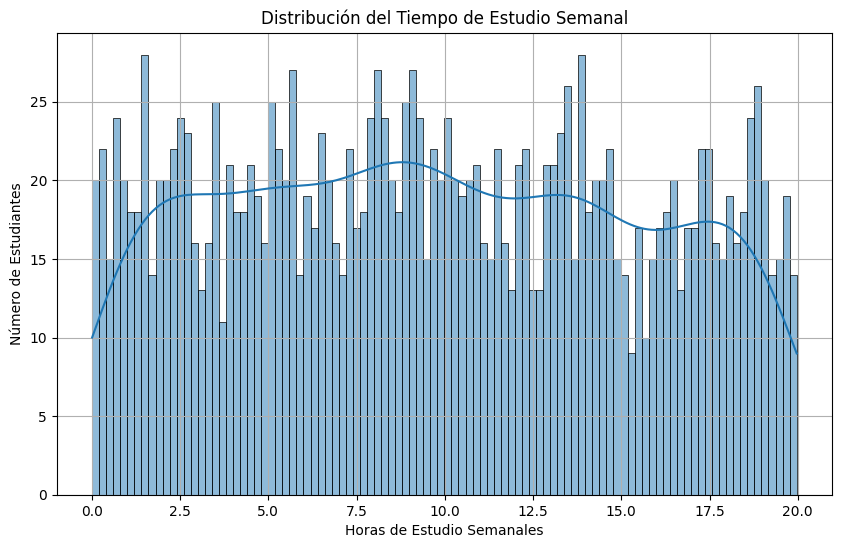

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

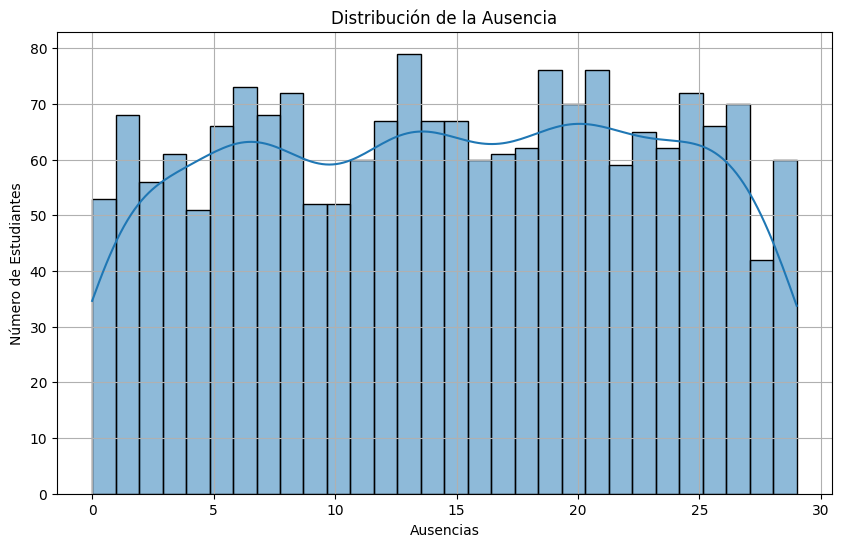

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

In [59]:
scaler = StandardScaler()
X_train[variables_numericas] = scaler.fit_transform(X_train[variables_numericas])

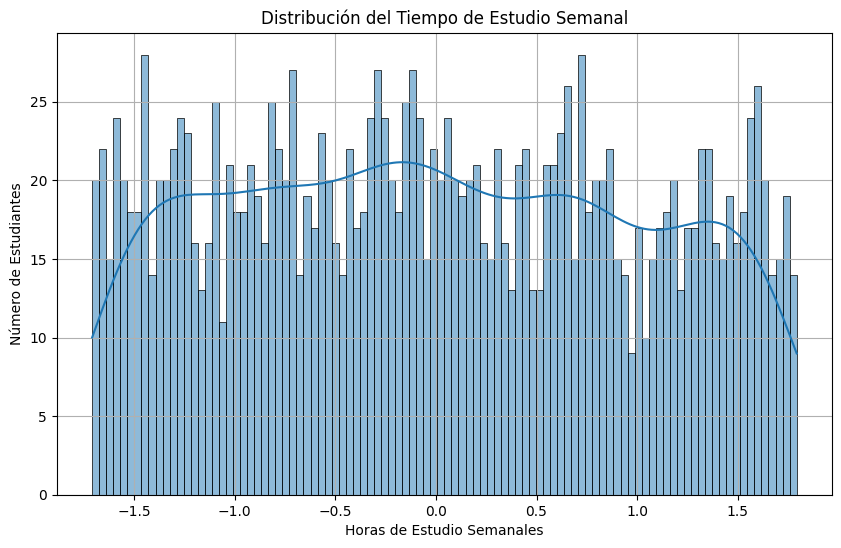

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

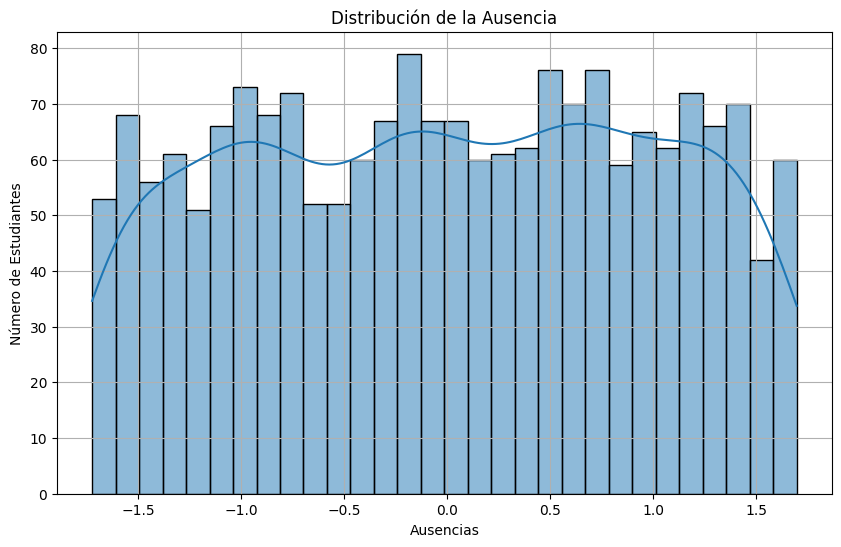

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

In [62]:
variables_categoricas

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering']

In [63]:
def plot_cat(ax, df, variable):
    counts = df[variable].value_counts().reset_index()
    counts.columns = [variable, 'Frequency']
    print(f"Value counts for {variable}:\n{counts}\n")
    
    sns.barplot(x=variable, y='Frequency', hue=variable, data=counts, dodge=False, palette='viridis', ax=ax)
    ax.set_title(f'Distribución de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    
    # Frecuencia encima de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Añadir leyenda
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title=variable, loc='upper right')